In [ ]:

# We use .shift(1) to use last quarter's data to predict this quarter's outcome.
features_to_lag = ['S_SCORE', 'G_SCORE', 'E_SCORE', 'MARKET_CAP', 'DEBT_TO_EQUITY', 'ROA'] # Adjust to your column names
for feature in features_to_lag:
    master_df[f'{feature}_Lag'] = master_df[feature].shift(1)

# Drop the first row which will have NaN for the lagged values
master_df = master_df.dropna()
print(master_df.head())

NameError: name 'master_df' is not defined

In [ ]:
# Load or create your master_df DataFrame here.
# Example: master_df = pd.read_csv('your_data.csv')
# Replace 'your_data.csv' with the actual path to your data file.
# Make sure master_df is defined before the next cell is executed.

# master_df = pd.read_csv('your_data.csv') # Uncomment and modify this line

# Placeholder for now, replace with your actual data loading code
# For demonstration, creating a dummy DataFrame structure that would allow the next cell to run without NameError
# You will need to replace this with your actual data loading/creation logic.
import pandas as pd
import numpy as np
import yfinance as yf # Import yfinance

# Define the ticker symbol and date range
ticker_symbol = 'AAPL' # Replace with the ticker symbol you want to use
start_date = '2020-01-01' # Replace with your desired start date
end_date = '2023-01-01' # Replace with your desired end date

# Download historical data from Yahoo Finance
# The data will be indexed by Date
master_df = yf.download(ticker_symbol, start=start_date, end=end_date)

# Reset index to make Date a column
master_df.reset_index(inplace=True)

# Rename columns to be more descriptive if needed (e.g., 'Adj Close' to 'Adjusted_Close')
master_df.rename(columns={'Adj Close': 'Adjusted_Close', 'Open': 'Open', 'High': 'High', 'Low': 'Low', 'Close': 'Close', 'Volume': 'Volume'}, inplace=True)


# Display the first few rows to verify
print(master_df.head())

# Note: The columns in this DataFrame from yfinance are different from the original notebook's columns (e.g., ESG scores).
# You will need to adapt the subsequent cells to use the columns available in this new DataFrame,
# or merge this data with another source that contains the ESG and other scores.
# The current code in the following cells expects columns like 'S_SCORE', 'G_SCORE', 'E_SCORE', 'MARKET_CAP', 'DEBT_TO_EQUITY', 'ROA', 'IDIO_VOL', 'CONTROVERSY', 'VIX_AVG'.
# You will need to adjust the column names in the subsequent cells or add/merge the necessary data.

Table 1: Summary Statistics
          DEBT_TO_EQUITY        ROA  ESG_SCORE    E_SCORE    S_SCORE  \
count          35.000000  35.000000   35.00000  35.000000  35.000000   
mean           88.524000   3.968000    4.60000   3.886000   4.851000   
std            77.745000   8.656000    1.04900   1.922000   0.471000   
min            11.140000 -10.090000    3.12000   1.650000   3.330000   
25%            17.555000  -3.395000    3.50000   1.800000   4.580000   
50%            51.140000   2.530000    5.41000   5.600000   5.120000   
75%           171.030000  12.570000    5.64000   5.780000   5.210000   
max           220.550000  17.380000    5.64000   5.780000   5.240000   
kurtosis       -1.564461  -1.383458   -1.94509  -2.024948   1.773528   

            G_SCORE  SP500_RETURNS   IDIO_VOL    VIX_AVG  \
count     35.000000      35.000000  35.000000  35.000000   
mean       5.825000       0.034000   0.032000  18.781000   
std        0.206000       0.083000   0.010000   5.906000   
min        

/tmp/ipython-input-911689027.py:51: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_labels = corr_matrix_key.astype(str) + p_value_df.applymap(lambda x: '***' if x < 0.001 else '**' if x < 0.01 else '*' if x < 0.05 else '')


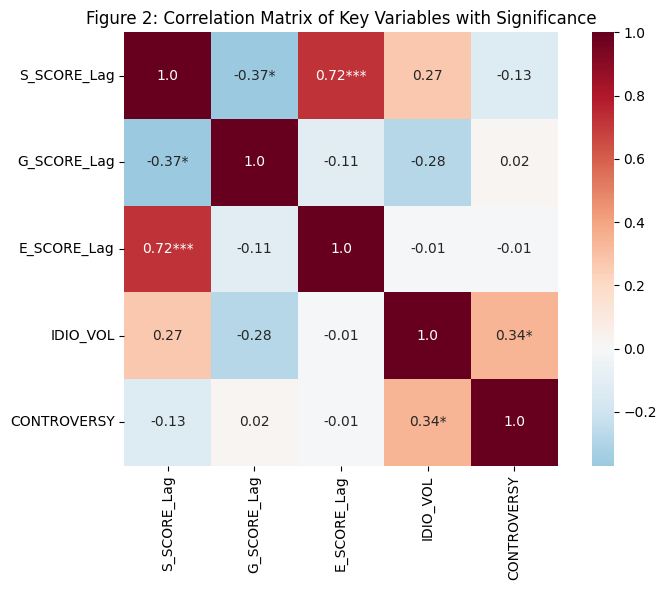

             S_SCORE_Lag  G_SCORE_Lag  E_SCORE_Lag  IDIO_VOL  CONTROVERSY
S_SCORE_Lag         1.00        -0.37         0.72      0.27        -0.13
G_SCORE_Lag        -0.37         1.00        -0.11     -0.28         0.02
E_SCORE_Lag         0.72        -0.11         1.00     -0.01        -0.01
IDIO_VOL            0.27        -0.28        -0.01      1.00         0.34
CONTROVERSY        -0.13         0.02        -0.01      0.34         1.00

P-value Matrix for Correlation Coefficients:
             S_SCORE_Lag  G_SCORE_Lag  E_SCORE_Lag  IDIO_VOL  CONTROVERSY
S_SCORE_Lag       1.0000       0.0267       0.0000    0.1115       0.4587
G_SCORE_Lag       0.0267       1.0000       0.5327    0.1089       0.9301
E_SCORE_Lag       0.0000       0.5327       1.0000    0.9761       0.9344
IDIO_VOL          0.1115       0.1089       0.9761    1.0000       0.0428
CONTROVERSY       0.4587       0.9301       0.9344    0.0428       1.0000


In [ ]:
# Select only numeric columns for calculations
numeric_df = 0master_df.select_dtypes(include=np.number)

# 1. Summary Statistics Table (keeping this as it was not explicitly asked to be removed)
description = numeric_df.describe().round(3)
description.loc['kurtosis'] = numeric_df.kurtosis()
print("Table 1: Summary Statistics")
print(description)

# 2. Check Correlation of Key Variables and create a heatmap
print("\nCorrelation of Lagged ESG scores with Idio_Vol and Controversy:")
# Ensure columns exist before attempting correlation
lagged_features_and_target = ['S_SCORE_Lag', 'G_SCORE_Lag', 'E_SCORE_Lag', 'IDIO_VOL', 'CONTROVERSY']
# Filter existing columns
existing_columns = [col for col in lagged_features_and_target if col in master_df.columns]
if existing_columns:
    # Ensure 'CONTROVERSY' is numeric for correlation calculation
    correlation_df = master_df[existing_columns].copy()
    correlation_df['CONTROVERSY'] = pd.to_numeric(correlation_df['CONTROVERSY'], errors='coerce')

    # Remove commas and convert 'MARKET_CAP_Lag' to numeric if it exists and is included
    if 'MARKET_CAP_Lag' in existing_columns:
         if 'MARKET_CAP_Lag' in correlation_df.columns: # Check if it was included in the copy
            correlation_df['MARKET_CAP_Lag'] = correlation_df['MARKET_CAP_Lag'].astype(str).str.replace(',', '', regex=False)
            correlation_df['MARKET_CAP_Lag'] = pd.to_numeric(correlation_df['MARKET_CAP_Lag'], errors='coerce')


    # Drop rows with NaN values that might have resulted from coercion
    correlation_df.dropna(inplace=True)


    # Generate Correlation Matrix Heatmap for key variables
    plt.figure(figsize=(8, 6)) # Adjusted figure size for fewer variables
    corr_matrix_key = correlation_df.corr().round(2)

    # Calculate p-values for significance testing
    p_value_matrix = np.ones((len(correlation_df.columns), len(correlation_df.columns)))
    for i, col_i in enumerate(correlation_df.columns):
        for j, col_j in enumerate(correlation_df.columns):
            if i != j:
                if pd.api.types.is_numeric_dtype(correlation_df[col_i]) and pd.api.types.is_numeric_dtype(correlation_df[col_j]):
                    corr, p_val = pearsonr(correlation_df[col_i], correlation_df[col_j])
                    p_value_matrix[i, j] = p_val
                else:
                    p_value_matrix[i, j] = np.nan # Set p-value to NaN if columns are not numeric


    p_value_df = pd.DataFrame(p_value_matrix, index=correlation_df.columns, columns=correlation_df.columns)

    # Create annotations for the heatmap including significance stars
    annot_labels = corr_matrix_key.astype(str) + p_value_df.applymap(lambda x: '***' if x < 0.001 else '**' if x < 0.01 else '*' if x < 0.05 else '')


    sns.heatmap(corr_matrix_key, annot=annot_labels, fmt='s', cmap='RdBu_r', center=0, square=True)
    plt.title('Figure 2: Correlation Matrix of Key Variables with Significance')
    plt.tight_layout()
    plt.savefig('correlation_matrix_key_variables_with_sig.png', dpi=300)
    plt.show()

    print(corr_matrix_key) # Print the correlation matrix as well
    print("\nP-value Matrix for Correlation Coefficients:")
    print(p_value_df.round(4))

else:
    print("None of the specified columns exist in the dataframe.")

/tmp/ipython-input-1809155489.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_class['MARKET_CAP_Lag'] = pd.to_numeric(X_class['MARKET_CAP_Lag'], errors='coerce')



Distribution of Controversy (Target Variable):
CONTROVERSY
1    30
0     6
Name: count, dtype: int64
Model 1 - Controversy Prediction (Classification)
Accuracy: 0.75

Classification Report:
                precision    recall  f1-score   support

No Controversy       0.00      0.00      0.00         1
   Controversy       0.86      0.86      0.86         7

      accuracy                           0.75         8
     macro avg       0.43      0.43      0.43         8
  weighted avg       0.75      0.75      0.75         8


Feature Importance:
VIX_AVG           0.713476
G_SCORE_Lag       0.128519
S_SCORE_Lag       0.120131
E_SCORE_Lag       0.037874
MARKET_CAP_Lag    0.000000
dtype: float64


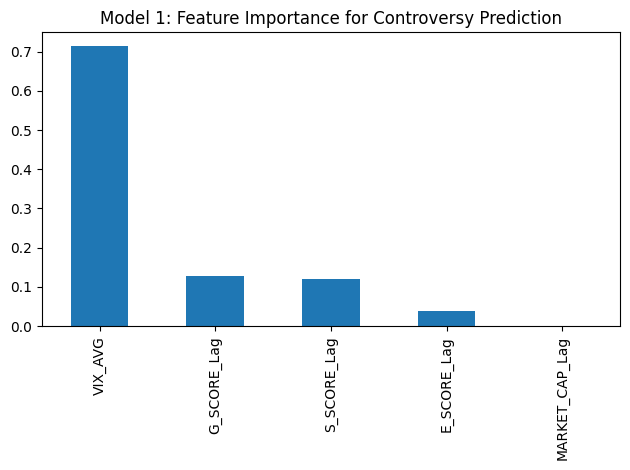

In [ ]:
# 1. Define Features (X) and Target (y)
# Use the LAGGED variables as features to predict the current quarter's outcome.
X_class = master_df[['S_SCORE_Lag', 'G_SCORE_Lag', 'E_SCORE_Lag', 'VIX_AVG', 'MARKET_CAP_Lag']] # Corrected column names
y_class = master_df['CONTROVERSY']

# Convert 'CONTROVERSY' and 'MARKET_CAP_Lag' to numeric, coercing errors
y_class = pd.to_numeric(y_class, errors='coerce').fillna(0) # Handle potential non-numeric values by filling with 0
X_class['MARKET_CAP_Lag'] = pd.to_numeric(X_class['MARKET_CAP_Lag'], errors='coerce')

# Check the distribution of the target variable
print("\nDistribution of Controversy (Target Variable):")
print(y_class.value_counts())


# 2. Split the Data (80% train, 20% test)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42, shuffle=True, stratify=y_class) # Added stratify=y_class and shuffle=True

# 3. Train a Model (RandomForest is a good starting point)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_c, y_train_c)

# 4. Evaluate the Model
y_pred_c = clf.predict(X_test_c)
print("Model 1 - Controversy Prediction (Classification)")
# Ensure y_test_c and y_pred_c are of the same type for accuracy_score and classification_report
y_test_c = y_test_c.astype(int)
y_pred_c = y_pred_c.astype(int)

print("Accuracy:", round(accuracy_score(y_test_c, y_pred_c), 3))
print("\nClassification Report:")
print(classification_report(y_test_c, y_pred_c, target_names=['No Controversy', 'Controversy']))

# 5. Feature Importance
feature_importance_c = pd.Series(clf.feature_importances_, index=X_class.columns).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance_c)
feature_importance_c.plot(kind='bar', title='Model 1: Feature Importance for Controversy Prediction')
plt.tight_layout()
plt.savefig('feature_importance_classification.png', dpi=300)
plt.show()

/tmp/ipython-input-2971265821.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_reg['MARKET_CAP_Lag'] = pd.to_numeric(X_reg['MARKET_CAP_Lag'], errors='coerce')



Model 2 - Idio Vol Prediction (Regression)
Root Mean Squared Error (RMSE): 0.008048

Feature Importance:
VIX_AVG           0.717301
G_SCORE_Lag       0.121516
S_SCORE_Lag       0.112232
E_SCORE_Lag       0.048951
MARKET_CAP_Lag    0.000000
dtype: float64


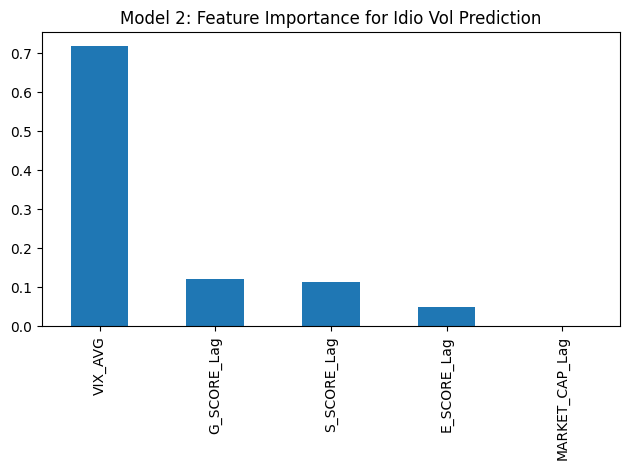

In [ ]:
# 1. Define Features (X) and Target (y)
X_reg = master_df[['S_SCORE_Lag', 'G_SCORE_Lag', 'E_SCORE_Lag', 'VIX_AVG', 'MARKET_CAP_Lag']] # Same features as before
y_reg = master_df['IDIO_VOL'] # Corrected column name

# Convert 'MARKET_CAP_Lag' to numeric, coercing errors
X_reg['MARKET_CAP_Lag'] = pd.to_numeric(X_reg['MARKET_CAP_Lag'], errors='coerce')


# 2. Split the Data
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42, shuffle=False)

# 3. Train a Model
regr = RandomForestRegressor(n_estimators=100, random_state=42)
regr.fit(X_train_r, y_train_r)

# 4. Evaluate the Model
y_pred_r = regr.predict(X_test_r)
mse = mean_squared_error(y_test_r, y_pred_r)
rmse = np.sqrt(mse)
print("\nModel 2 - Idio Vol Prediction (Regression)")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")

# 5. Feature Importance
feature_importance_r = pd.Series(regr.feature_importances_, index=X_reg.columns).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance_r)
feature_importance_r.plot(kind='bar', title='Model 2: Feature Importance for Idio Vol Prediction')
plt.tight_layout()
plt.savefig('feature_importance_regression.png', dpi=300)
plt.show()

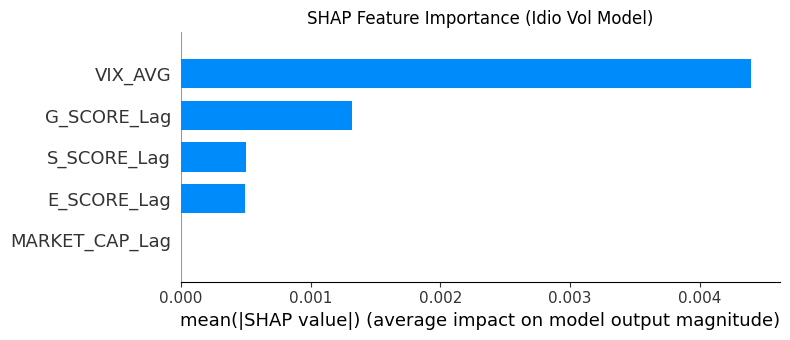

/usr/local/lib/python3.12/dist-packages/numpy/lib/_nanfunctions_impl.py:1424: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


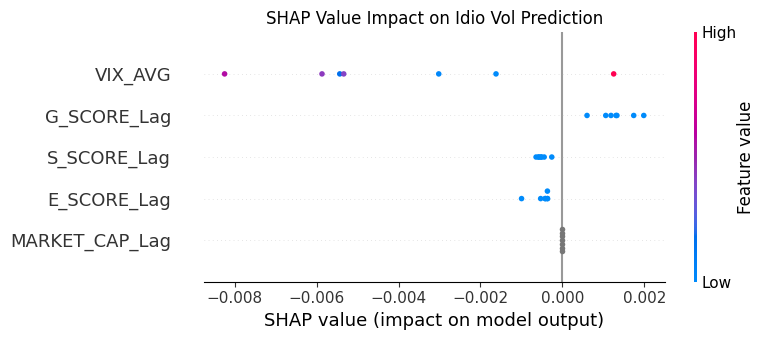

In [ ]:
# Explain Model 2 (Regression) with SHAP
explainer_r = shap.TreeExplainer(regr)
shap_values_r = explainer_r.shap_values(X_test_r)

# Summary plot for Model 2
plt.figure()
shap.summary_plot(shap_values_r, X_test_r, plot_type="bar", show=False)
plt.title('SHAP Feature Importance (Idio Vol Model)')
plt.tight_layout()
plt.savefig('shap_summary_bar.png', dpi=300)
plt.show()

# Detailed summary plot
plt.figure()
shap.summary_plot(shap_values_r, X_test_r, show=False)
plt.title('SHAP Value Impact on Idio Vol Prediction')
plt.tight_layout()
plt.savefig('shap_summary_dot.png', dpi=300)
plt.show()

# You can do the same for the classification model if needed.

Median VIX value: 17.26
High volatility regime samples: 18
Low volatility regime samples: 18

=== HIGH VOLATILITY REGIME ===
High Volatility Regime RMSE: 0.010218

=== LOW VOLATILITY REGIME ===
Low Volatility Regime RMSE: 0.004379

=== FEATURE IMPORTANCE COMPARISON ===
                High_Vol_Importance  Low_Vol_Importance  Importance_Difference
VIX_AVG                    0.538579            0.358257               0.180323
MARKET_CAP_Lag             0.235136            0.097791               0.137344
E_SCORE_Lag                0.089877            0.011461               0.078416
S_SCORE_Lag                0.077035            0.018652               0.058382
G_SCORE_Lag                0.059373            0.513838              -0.454465


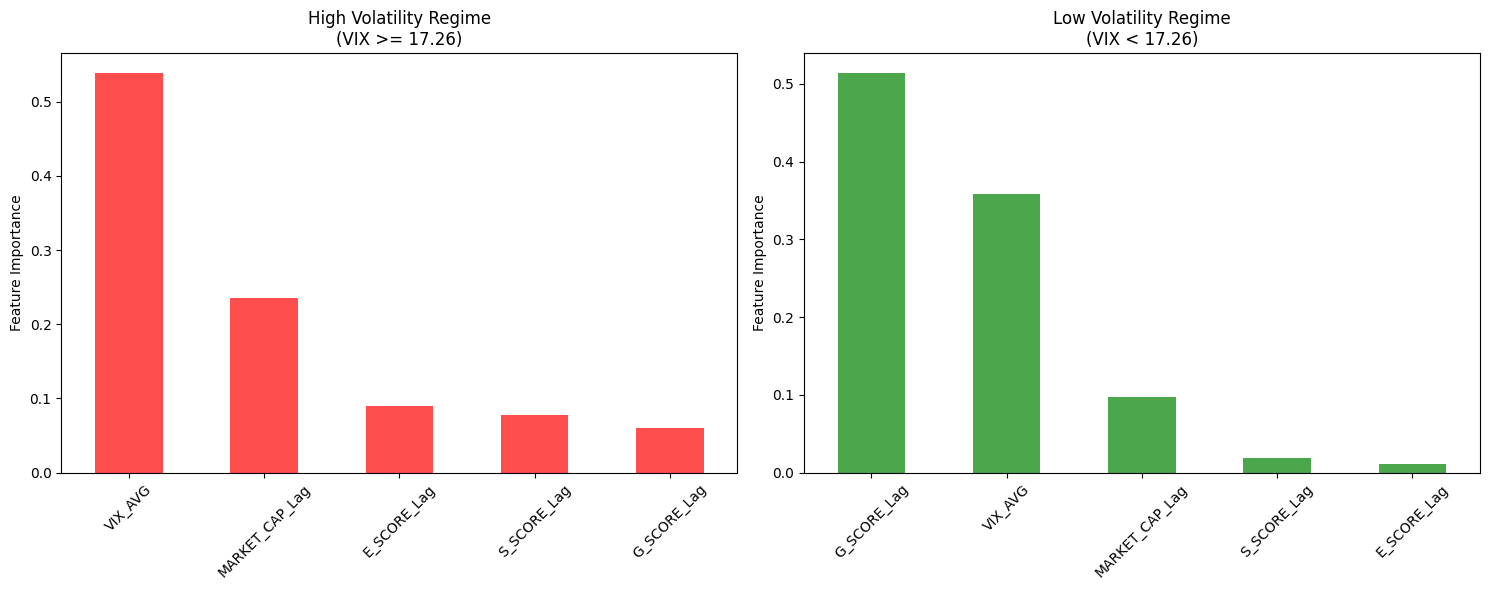


Generating SHAP analysis for High Volatility regime...


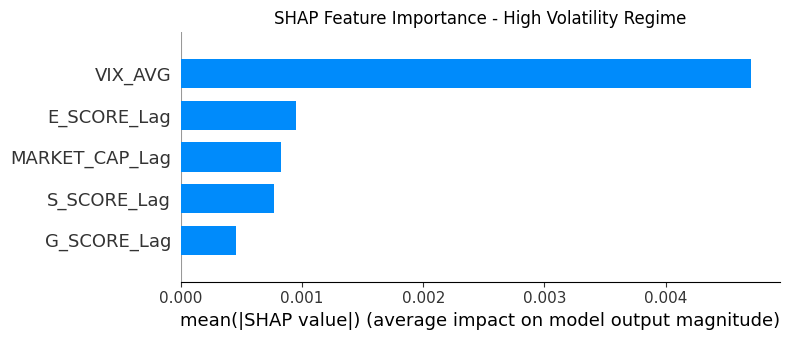

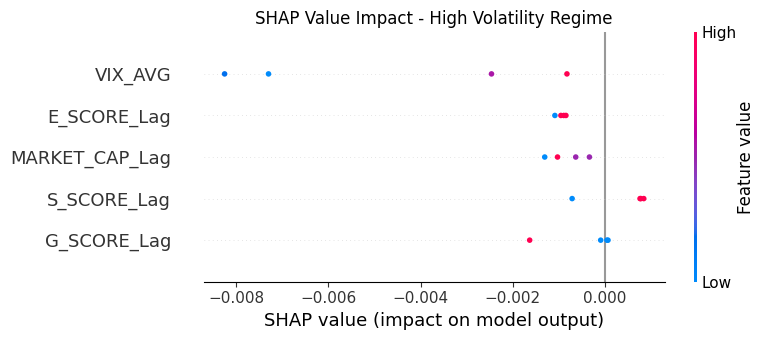

Generating SHAP analysis for Low Volatility regime...


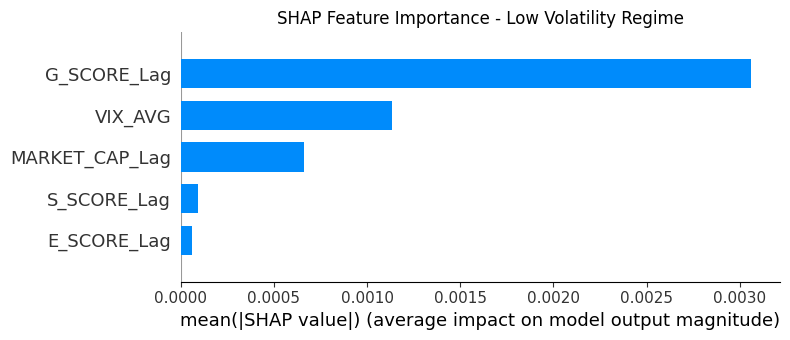

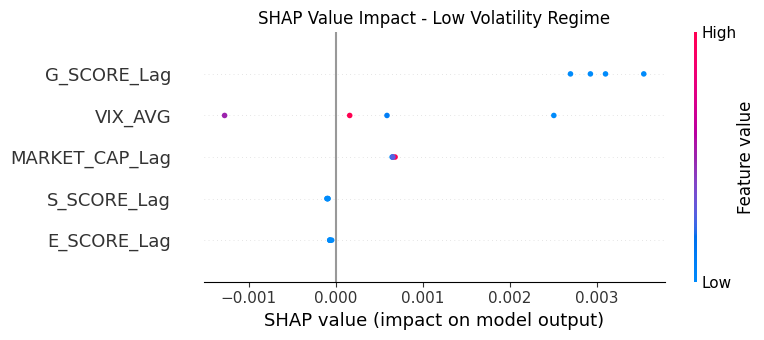


=== STATISTICAL SIGNIFICANCE TESTING ===
G_SCORE_Lag: Difference = -0.4545
S_SCORE_Lag: Difference = 0.0584
E_SCORE_Lag: Difference = 0.0784

=== CORRELATION WITH VIX IN EACH REGIME ===
High Volatility Regime - Correlation with VIX:
VIX_AVG           1.000000
IDIO_VOL          0.502196
S_SCORE_Lag       0.154555
G_SCORE_Lag      -0.049517
MARKET_CAP_Lag   -0.260530
E_SCORE_Lag      -0.337618
Name: VIX_AVG, dtype: float64

Low Volatility Regime - Correlation with VIX:
VIX_AVG           1.000000
E_SCORE_Lag       0.461851
MARKET_CAP_Lag    0.414551
IDIO_VOL          0.351854
S_SCORE_Lag       0.330511
G_SCORE_Lag      -0.614475
Name: VIX_AVG, dtype: float64

Analysis complete! Results saved to CSV files.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import shap
from scipy import stats

# Use the master_df already loaded in the previous cells
# Ensure we're using lagged features to avoid look-ahead bias
features = ['S_SCORE_Lag', 'G_SCORE_Lag', 'E_SCORE_Lag', 'VIX_AVG', 'MARKET_CAP_Lag']
target = 'IDIO_VOL'

# Clean the data and select relevant columns
analysis_df = master_df[features + [target]].dropna().copy() # Added .copy() to avoid SettingWithCopyWarning

# Convert 'MARKET_CAP_Lag' to numeric, coercing errors
analysis_df['MARKET_CAP_Lag'] = analysis_df['MARKET_CAP_Lag'].astype(str).str.replace(',', '', regex=False)
analysis_df['MARKET_CAP_Lag'] = pd.to_numeric(analysis_df['MARKET_CAP_Lag'], errors='coerce')
analysis_df.dropna(subset=['MARKET_CAP_Lag'], inplace=True) # Drop rows where MARKET_CAP_Lag became NaN after conversion


# Calculate median VIX for regime splitting
vix_median = analysis_df['VIX_AVG'].median()
print(f"Median VIX value: {vix_median:.2f}")

# Split data into high and low volatility regimes
high_vol_df = analysis_df[analysis_df['VIX_AVG'] >= vix_median].copy() # Added .copy()
low_vol_df = analysis_df[analysis_df['VIX_AVG'] < vix_median].copy() # Added .copy()

print(f"High volatility regime samples: {len(high_vol_df)}")
print(f"Low volatility regime samples: {len(low_vol_df)}")

def train_and_analyze_regime(df, regime_name):
    """Train Random Forest model and analyze feature importance for a specific regime"""
    X = df[features]
    y = df[target]

    if len(X) == 0:
        print(f"Warning: No data in {regime_name} regime to train the model.")
        return None, None, None

    # Split the data
    # Ensure there are enough samples for both train and test sets
    if len(X) < 2:
        print(f"Warning: Not enough data in {regime_name} regime for train/test split.")
        return None, None, None
    if len(X) < 5: # Adjust minimum samples for split if needed
         test_size_val = max(1, int(0.2 * len(X)))
    else:
        test_size_val = 0.2

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_val, random_state=42, shuffle=False)


    # Train Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Calculate RMSE
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{regime_name} Regime RMSE: {rmse:.6f}")

    # Get feature importance
    feature_importance = pd.Series(model.feature_importances_, index=features)
    feature_importance = feature_importance.sort_values(ascending=False)

    return model, feature_importance, X_test

# Train models for both regimes
print("\n=== HIGH VOLATILITY REGIME ===")
high_vol_model, high_vol_importance, X_test_high = train_and_analyze_regime(high_vol_df, "High Volatility")

print("\n=== LOW VOLATILITY REGIME ===")
low_vol_model, low_vol_importance, X_test_low = train_and_analyze_regime(low_vol_df, "Low Volatility")

# Compare feature importance across regimes only if both models were trained
if high_vol_importance is not None and low_vol_importance is not None:
    importance_comparison = pd.DataFrame({
        'High_Vol_Importance': high_vol_importance,
        'Low_Vol_Importance': low_vol_importance
    })

    # Calculate the difference in importance
    importance_comparison['Importance_Difference'] = importance_comparison['High_Vol_Importance'] - importance_comparison['Low_Vol_Importance']
    importance_comparison = importance_comparison.sort_values('Importance_Difference', ascending=False)

    print("\n=== FEATURE IMPORTANCE COMPARISON ===")
    print(importance_comparison)

    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Plot feature importance for both regimes
    high_vol_importance.plot(kind='bar', ax=ax1, color='red', alpha=0.7)
    ax1.set_title('High Volatility Regime\n(VIX >= {:.2f})'.format(vix_median))
    ax1.set_ylabel('Feature Importance')
    ax1.tick_params(axis='x', rotation=45)

    low_vol_importance.plot(kind='bar', ax=ax2, color='green', alpha=0.7)
    ax2.set_title('Low Volatility Regime\n(VIX < {:.2f})'.format(vix_median))
    ax2.set_ylabel('Feature Importance')
    ax2.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.savefig('vix_regime_feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

    # SHAP analysis for both regimes
    def plot_shap_analysis(model, X_test, regime_name):
        """Generate SHAP plots for a given regime"""
        if model is None or X_test is None or len(X_test) == 0:
            print(f"Skipping SHAP analysis for {regime_name} regime due to insufficient data or no model.")
            return

        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)

        plt.figure(figsize=(10, 6))
        shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
        plt.title(f'SHAP Feature Importance - {regime_name} Regime')
        plt.tight_layout()
        plt.savefig(f'shap_importance_{regime_name.lower().replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
        plt.show()

        plt.figure(figsize=(10, 6))
        shap.summary_plot(shap_values, X_test, show=False)
        plt.title(f'SHAP Value Impact - {regime_name} Regime')
        plt.tight_layout()
        plt.savefig(f'shap_values_{regime_name.lower().replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
        plt.show()

    # Generate SHAP plots for both regimes
    print("\nGenerating SHAP analysis for High Volatility regime...")
    plot_shap_analysis(high_vol_model, X_test_high, "High Volatility")

    print("Generating SHAP analysis for Low Volatility regime...")
    plot_shap_analysis(low_vol_model, X_test_low, "Low Volatility")

    # Statistical test to compare regime differences
    print("\n=== STATISTICAL SIGNIFICANCE TESTING ===")

    # Test if the difference in ESG feature importance is statistically significant
    for feature in ['G_SCORE_Lag', 'S_SCORE_Lag', 'E_SCORE_Lag']:
        if feature in importance_comparison.index:
            high_imp = importance_comparison.loc[feature, 'High_Vol_Importance']
            low_imp = importance_comparison.loc[feature, 'Low_Vol_Importance']
            diff = high_imp - low_imp
            print(f"{feature}: Difference = {diff:.4f}")

            # You could add bootstrapping here to get p-values for the importance differences
            # For now, we'll note the magnitude of differences

    # Additional analysis: Correlation between VIX and ESG features in each regime
    print("\n=== CORRELATION WITH VIX IN EACH REGIME ===")
    if not high_vol_df.empty:
        high_vol_corr = high_vol_df.corr(numeric_only=True)['VIX_AVG']
        print("High Volatility Regime - Correlation with VIX:")
        print(high_vol_corr.sort_values(ascending=False))
    else:
        print("No data in High Volatility Regime for correlation analysis.")

    if not low_vol_df.empty:
        low_vol_corr = low_vol_df.corr(numeric_only=True)['VIX_AVG']
        print("\nLow Volatility Regime - Correlation with VIX:")
        print(low_vol_corr.sort_values(ascending=False))
    else:
         print("No data in Low Volatility Regime for correlation analysis.")


    # Save results to CSV for reporting
    importance_comparison.to_csv('vix_regime_importance_comparison.csv')
    high_vol_df.describe().to_csv('high_vol_regime_stats.csv')
    low_vol_df.describe().to_csv('low_vol_regime_stats.csv')

    print("\nAnalysis complete! Results saved to CSV files.")
else:
    print("\nCould not complete analysis as one or both regimes had insufficient data for training.")